# Homework Assignment #2 (Individual)
## Pandas Review and Python Classes

### <p style="text-align: right;"> &#9989; Richard Arbury</p>
### <p style="text-align: right;"> &#9989; arburyri</p>

### Goals for this homework assignment
By the end of this assignment, you should be able to:
- Write a generalizable class to store data
- Write subclasses that inherit general variables and methods from a parent class
- Identify key pieces of information that need to be stored as class variables
- Write methods that fetch and modify class variables 
- Write a function that instantiates new objects given some initial set of parameters

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **62 points** possible on this assignment. Point values for each part are included in the section headers and question prompts.

**This assignment is due in roughly two weeks from now at 11:59 pm on Friday, October 7th.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2.  Submission instructions can be found at the end of the notebook.

---
## Part 0: Add to your Git repository to track your progress on your assignment (5 points)

For this assignment, you're going to add it to the `cmse202-f22-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f22-turnin` repository and create a new directory called `hw-02`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f22-turnin`" repository inside the `hw-02` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

!git clone https://github.com/arburyri/cmse202-f22-turnin.git

# Using Classes to Store Data


One of the primary ways that classes are used is to organize datasets in a way that is both easy to manipulate and key pieces of information are easily accessible. 

For this homework assignment, you will be: 
1. **Creating your own class to encapsulate a dataset**
2. **Using that class to create sub-classes**
2. **Applying your class(es) to a real data set by creating object instances**
2. **Using your objects to answer a (relatively) simple question of the dataset.**

One of the great benefits of classes is their flexibility; they can be applied to anything. For this assignment, you can do these tasks with any dataset. The tasks listed above have been designed to work with (virtually) any dataset. For folks that have recently taken 201 and used a dataset for their final project, you may want to consider using it for this assignment. 


The following set of tasks are specifically geared towards the following dataset: 

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_2/netflix_titles.csv`

which [comes from here](https://www.kaggle.com/datasets/shivamb/netflix-shows).

You may complete the following specific tasks for the Netflix dataset, or you may use a different dataset and complete your own version of these tasks for your chosen dataset.

## Part 1: Examine your Dataset

#### 1.1 Describing your Dataset (2 Points)
&#9989; Use Pandas to read in your dataset. Describe the conetents of this dataset (E.g., the column names, what they represent, etc.)



In [69]:
import pandas as pd

filepath = r"netflix_titles.csv"
   

df = pd.read_csv(filepath)
   
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

The data shows the entertainments type, id, title, director, country of production, date added, release year, rating, and duration

#### 1.2 Dropping Data Columns (2 Points)
&#9989; We won't be using the first and last columns of this dataframe, so drop them.

In [70]:
df.pop(df.columns.values[0])
df.pop(df.columns.values[-1])
print(df.head())

      type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water              NaN   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans              NaN   
4  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 202

#### 1.3 Thinking about Organizing Data (2 Points)

&#9989; In order to organize things it is useful to classify them into categories. Imagine that each line of the dataset is an instance of an object(s). How would you organize this dataset using object oriented programming? What would the parent class and its child classes be? Think of the Zoo and Animal classes 

We could go off televison for a parent class, then movie or show. From here we could add the details like country, release year, etc.

## Part 2: Creating your (Parent) Class 

#### 2.1: Creating the Class (9 Points)

&#9989; Create a class called `Production`. The Class should have the attributes `title`, `release_year`, and `genre`. The class should also have `get` and `set` methods for each of the three attributes.

In [71]:
class Production:
    

    
    def __init__(self, title):
        self.title=title
        self.release_year=""
        self.genre=""
        
        
    
    
    def set_title(self,title):
        self.title=title
    
    def set_genre(self,genre):
        self.genre=genre
        
    def get_genre(self):
        return self.genre
    
        
        
    def get_title(self):
        return self.title
    
    def set_release_year(self,release_year):
        self.release_year=release_year
        
    def get_release_year(self):
        return self.release_year
    
    def info(self):
        print(self.title,self.genre,self.release_year)

#### 2.2: Testing the Class (2 Points)

&#9989; Select a random entry in the dataset and turn it into a `Production` class object. Print out the title and release year to make sure it is working correctly.

In [72]:
sample=df.sample()
print(sample)

sex_and_the_city2=Production('sex_and_the_city2')
sex_and_the_city2.set_title('sex_and_the_city2')
sex_and_the_city2.set_release_year('2010')
sex_and_the_city2.set_genre('Comedies, Drama, dumb')
test1=sex_and_the_city2.info()
print(test1)

       type                      title     director  \
8787  Movie  You Can’t Fight Christmas  Kenny Young   

                                                   cast        country  \
8787  Brely Evans, Andra Fuller, Persia White, Porsc...  United States   

             date_added  release_year rating duration  \
8787  December 19, 2017          2017  TV-PG   85 min   

                      listed_in  
8787  Comedies, Romantic Movies  
sex_and_the_city2 Comedies, Drama, dumb 2010
None


---
### &#128721; STOP (1 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository. Merge the changes in the main branch, and push the changes to GitHub.

---

## Part 3: Creating your (Child) Classes

#### 3.1 Making the Child Classes (12 Points)

&#9989; Create child classes `Movie` and `TV_Show`. The `Movie` child class should have the added attribute `director` and the `TV_Show` subclass should have the attribute `seasons`. Make sure that each of the child classes has an `__init__` function that takes all of the necessary information to create an instance of that class. 

**Note:** Your child classes should use the `super()` function.

In [73]:



class Movie(Production):
    def __init__(self,title):
        super().__init__(title)
        self.kind = 'movie'
        self.director=''

    def set_director(self,director):
        self.director= director
    def get_director(self):
        return self.director
    def get_info2(self):
        print(self.title,self.genre,self.release_year,self.director)
    
class TV_Show(Production):
    def __init__(self,title):
        super().__init__(title)
        self.kind = 'TV Show'
        self.seasons=''

        
    def set_seasons(self,seasons):
        self.seasons= seasons
    def get_seasons(self):
        return self.seasons
    def get_info2(self):
        print(self.title,self.genre,self.release_year, self.seasons)
        
        
            
        

#### 3.2: Testing Child Classes (4 points)

&#9989;  Create an instance of both of your objects to ensure that they're working. Use any entry you like to create your objects. Print the director for the `Movie` and the number of seasons for the `TV_Show`.

In [74]:
Border_patrol=TV_Show('Border Patrol')
Border_patrol.set_seasons('12')
sex_and_the_city2=Movie('Sex and the City 2')
sex_and_the_city2.set_director('Michael King')

sex_and_the_city2.get_info2()
Border_patrol.get_info2()

Sex and the City 2   Michael King
Border Patrol   12


## Part 4: Creating your Objects

#### 4.1: Make all of the Objects! (6 Points)

&#9989; Write a piece of code that uses your dataset to build a list of `Movie` and a list of `TV_Show` objects.

In [75]:
import csv
import pandas as pd
filepath = r"netflix_titles1.csv"
df = pd.read_csv(filepath)
for row in df:
    print(row)
    

show_id
type1
title
director
cast
country
date_added
release_year
rating
duration
listed_in
description


In [76]:
movies=[]
tvshows=[]
for i in range(len(df)):
    if df.iloc[i,:][1]=="Movie":
        movie=Movie(df.iloc[i,:][2])
        movie.set_director(df.iloc[i,:][3])
        movie.set_genre(df.iloc[i,:][10])
        movie.set_release_year(df.iloc[i,:][7])
        movie.set_title(df.iloc[i,:][2])
        movies.append(movie)
for i in range(len(df)):
    if df.iloc[i,:][1]=="TV Show":
        tv=TV_Show(df.iloc[i,:][2])
        tv.set_seasons(df.iloc[i,:][9])
        tv.set_genre(df.iloc[i,:][10])
        tv.set_release_year(df.iloc[i,:][7])
        tv.set_title(df.iloc[i,:][2])
        tvshows.append(tv)

#### 4.2: Make sure the `Movie`s and `TV_Show`s work! (2 Points)

&#9989; To test whether you succesfully created the `Movie` and `TV_Show` objects, print out the titles and genres for the first handful (5-10) of `TV_Show` objects.

In [77]:
for i in movies[0:5]:
    i.info()
for i in tvshows[0:5]:
    i.info()

Dick Johnson Is Dead Documentaries 2020
My Little Pony: A New Generation Children & Family Movies 2021
Sankofa Dramas, Independent Movies, International Movies 1993
The Starling Comedies, Dramas 2021
Je Suis Karl Dramas, International Movies 2021
Blood & Water International TV Shows, TV Dramas, TV Mysteries 2021
Ganglands Crime TV Shows, International TV Shows, TV Action & Adventure 2021
Jailbirds New Orleans Docuseries, Reality TV 2021
Kota Factory International TV Shows, Romantic TV Shows, TV Comedies 2021
Midnight Mass TV Dramas, TV Horror, TV Mysteries 2021


---
### &#128721; STOP (1 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository. Merge the changes in the main branch, and push the changes to GitHub.

---

## Part 5: Answering your Question


We’re going to answer the question **“How has the number of Drama TV Shows changed over time?”**

To answer this question, we’ll need to look at the `release_year` and `genre` variables for each of our `TV_Show` objects. **But** we have a small problem. 

#### 5.1 Identifying the Issue (1 Point)
&#9989; To see what that is, **print out the `genre` of a random `TV_Show` object.**

In [78]:
movies[0].get_genre()
movies[0].info()
tvshows[8].get_genre()


Dick Johnson Is Dead Documentaries 2020


'British TV Shows, Crime TV Shows, Docuseries'

We need to be able to group the TV shows based on their genre, but TV shows have multiple genres! We need to be able to break apart these genres. 


#### 5.2: Fixing the Issue (2 Points)
&#9989; Write a piece of code that will split apart the `genre` string into a `list` of genres. Make sure your code is working by testing it on the list of genres from the previous problem. *Note: This will involve tools we haven’t talked about in class. Use Google to help you solve this problem!*

In [79]:
genres=[]
for i in tvshows:
    genre=i.get_genre()
    genres.append(genre)
newlist=[]
for i in range(len(genres)):
    new=genres[i].split(",")
    newlist.append(new)
    
newlist

[['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Docuseries', ' Reality TV'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries'],
 ['British TV Shows', ' Reality TV'],
 ['Crime TV Shows', ' Docuseries', ' International TV Shows'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['British TV Shows', ' Crime TV Shows', ' Docuseries'],
 ['TV Comedies', ' TV Dramas'],
 ['Crime TV Shows', ' Spanish-Language TV Shows', ' TV Dramas'],
 ['International TV Shows',
  ' Spanish-Language TV Shows',
  ' TV Action & Adventure'],
 ['Crime TV Shows', ' Docuseries', ' International TV Shows'],
 ['International TV Shows', ' TV Action & Adventure', ' TV Dramas'],
 ['Docuseries', ' International TV Shows', ' Reality TV'],
 ['TV Comedies'],
 ['British TV Shows', ' International TV Shows', ' TV Comedies'],
 ['International TV Shows',

#### 5.3: Applying the Fix to our Class (3 Points)
&#9989;  Take the code that you wrote in the previous problem and turn it into a method for the `Production` class. Run this method within the `__init__` method so that every `Production` object comes into being with the genres split apart into a list.

In [80]:
class Production:
    

    
    def __init__(self, title,genre):
        self.title=title
        self.release_year=""
        newlist=[]
        for i in range(len(genres)):
            new=genres[i].split(",")
            newlist.app
        self.genre=genre.split(",")
            
    
    
        
        
        
        
    
        
    def set_title(self,title):
        self.title=title
    
    def set_genre(self,genre):
        self.genre=genre
        
    def get_genre(self):
        return self.genre
    
        
        
    def get_title(self):
        return self.title
    
    def set_release_year(self,release_year):
        self.release_year=release_year
        
    def get_release_year(self):
        return self.release_year
    
    def info(self):
        print(self.title,self.genre,self.release_year)
        
        

        
            
        

#### 5.4: Rebuilding (1 Point)

&#9989; Rebuild your `Movie` and `TV_Show` objects with this new addition to the `Production` class. NOTE: you will need to rerun your code from Part 3 for this to work.

In [81]:
class Production:
    

    
    def __init__(self, title):
        self.title=title
        self.release_year=""
        self.genre=""
        
        
    

        
    def set_title(self,title):
        self.title=title
    
    def set_genre(self,genre):
        self.genre=genre
        
    def get_genre(self):
        return self.genre
    
        
        
    def get_title(self):
        return self.title
    
    def set_release_year(self,release_year):
        self.release_year=release_year
        
    def get_release_year(self):
        return self.release_year
    
    def info(self):
        print(self.title,self.genre,self.release_year)

#### 5.5: Am I the Drama...? (1 Point)

&#9989; Select all of the `TV_Show` objects that have drama as one of their genres.

In [82]:
dramas=[]
tvshows[0].get_genre()
for i in tvshows:
    if i.get_genre()=='TV Dramas':
        drama=i.get_title()
        dramas.append(drama)
        
dramas

['Chicago Med',
 'Pose',
 'Halston',
 'Selena: The Series',
 'Heartland',
 "The Queen's Gambit",
 'Evil',
 'Greenleaf',
 'Dynasty',
 'Madam Secretary',
 'Hollywood',
 'Self Made: Inspired by the Life of Madam C.J. Walker',
 'Spinning Out',
 "Dolly Parton's Heartstrings",
 'Knightfall',
 'Tales of the City',
 'Northern Rescue',
 'Life Sentence',
 'The Night Shift',
 'Halt and Catch Fire',
 "TURN: Washington's Spies",
 'Godless',
 'Reign',
 'Gypsy',
 'The Get Down',
 'The Borgias',
 'A.D. Kingdom and Empire',
 'Highway to Heaven',
 'Mad Men',
 'Shaka Zulu',
 'Tales of the City (1993)',
 'The Fosters',
 'The Tudors',
 'The West Wing',
 'When Calls the Heart']

#### 5.6: Release Years (1 Point)

&#9989; Use your list of `TV_Show` objects to create a list of all of the release years that Drama TV shows came out.

In [83]:
years1=[]
for i in range(len(tvshows)):
    if tvshows[i].get_title() in dramas:
        years=tvshows[i].get_release_year()
        years1.append(years)

In [84]:
years1

[2019,
 2019,
 2021,
 2020,
 2019,
 2020,
 2019,
 2020,
 2019,
 2019,
 2020,
 2020,
 2020,
 2019,
 2019,
 2019,
 2019,
 2018,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2013,
 2015,
 1988,
 2014,
 1986,
 1993,
 2017,
 2010,
 2005,
 2017]

#### 5.7: Counting the Years (2 Points)

&#9989; Make two lists, one with release years and the other with the number of drama TV shows released during that year. [This page from Stack Overflow](https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-an-unordered-list) may be useful.


In [85]:
import pandas as pd
import numpy as np
import numpy as np    
(unique, counts) = np.unique(years1, return_counts=True)
{x:y for x,y in zip(unique, counts)}


{1986: 1,
 1988: 1,
 1993: 1,
 2005: 1,
 2010: 1,
 2013: 1,
 2014: 1,
 2015: 1,
 2017: 9,
 2018: 1,
 2019: 10,
 2020: 6,
 2021: 1}

#### 5.8: It isn't Real Unitl you Make a Plot (2 Points)

&#9989; Make a plot showing the number of dramas versus release year.

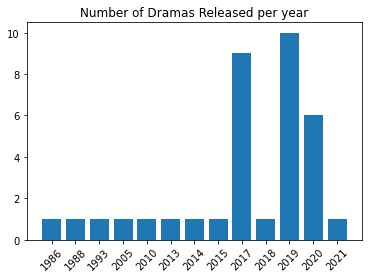

In [86]:
from matplotlib import pyplot as plt
plt.bar(range(len(unique)), counts, tick_label=unique)
plt.title('Number of Dramas Released per year')
plt.xticks(rotation=45)
plt.show()

---
### &#128721; STOP (1 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository. Merge the changes in the main branch, and push the changes to GitHub.

---

trying something new

### Congratulations, you're done!

&#169; Copyright 2021,  Department of Computational Mathematics, Science and Engineering at Michigan State University